In [6]:
import numpy as np
import scipy.stats
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# OMNI data fit

Several decades of solar wind and geospace environment data in ASCII format are described in

    http://spdf.gsfc.nasa.gov/pub/data/omni/00readme.txt

The "low resolution" (LRO) data

    ftp://spdf.gsfc.nasa.gov/pub/data/omni/low_res_omni/omni2.text

are available at a 1-hour cadence.  There are some data from the 1960's and 1970's, but mostly after 1980.  These records are convenient for quick looks and rough comparisons.

The "high resolution" (HRO) data start in 1981 and

    ftp://spdf.gsfc.nasa.gov/pub/data/omni/high_res_omni/00readme.txt

are available at 1-minute and 5-minute cadence.  These data are useful for detailed analysis but with millions of records it can take a while to select subsets or calculate statistics.

In [2]:
# /home/bjackel/Dropbox/work/dataflow/magnet/nasa_omni.py
#dat = load_datafile('/data/public/spdf.gsfc.nasa.gov/pub/data/omni/high_res_omni/omni_min2014.asc', dataname='HRO_1minute')
#np.save('/tmp/omni_1min_2014.npy', np.ma.getdata( dat ) )

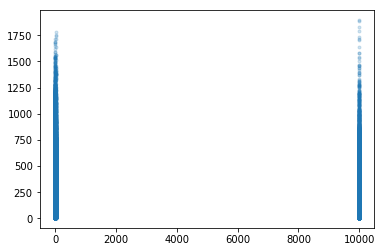

In [3]:
data = np.load('C:/Users/Patrick/OneDrive/School/W2019/PHYS581/Lecture Notes/omni_1min_2014.npy')
plt.plot( data['bz'], data['ae_index'], '.', alpha=0.2 )

## Record format
There should be one of these records for each minute.  However, some or all of the fields may be missing and filled with a gap value eg. 9999.9

dat.dtype
Out[24]: dtype([('year', '<i4'), ('day', '<i4'), ('hour', '<i4'), ('minute', '<i4'), ('imf_id', '<i4'), ('plasma_id', '<i4'), ('imf_n_average', '<i4'), ('plasma_n_average', '<i4'), ('percent_interpolated', '<i4'), ('timeshift', '<i4'), ('timeshift_rms', '<i4'), ('pfn_rms', '<f4'), ('observation_time_delta', '<i4'), ('b_magnitude', '<f4'), ('bx', '<f4'), ('by', '<f4'), ('bz', '<f4'), ('by_gsm', '<f4'), ('bz_gsm', '<f4'), ('b_magnitude_rms', '<f4'), ('b_vector_rms', '<f4'), ('v', '<f4'), ('vx', '<f4'), ('vy', '<f4'), ('vz', '<f4'), ('proton_density', '<f4'), ('temperature', '<f4'), ('dynamic_pressure', '<f4'), ('electric_field', '<f4'), ('plasma_beta', '<f4'), ('alfven_mach_number', '<f4'), ('pos_x', '<f4'), ('pos_y', '<f4'), ('pos_z', '<f4'), ('bow_x', '<f4'), ('bow_y', '<f4'), ('bow_z', '<f4'), ('ae_index', '<i4'), ('al_index', '<i4'), ('au_index', '<i4'), ('symd_index', '<i4'), ('symh_index', '<i4'), ('asymd_index', '<i4'), ('asymh_index', '<i4'), ('pc_index', '<f4'), ('magnetosonic_mach_number', '<f4'), ('utime', '<i4')])

(-19, 19)

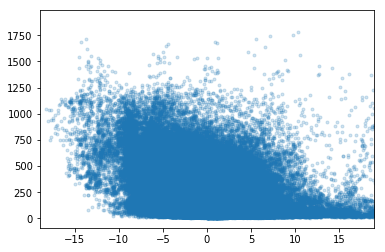

In [4]:
wgood = (-19 >= data['bz']) <= 19
wgood &= (0 >= data['ae_index']) <= 1999
dat = data[wgood]
plt.plot( data['bz'], data['ae_index'], '.', alpha=0.2 )
plt.xlim(-19, 19)

In [5]:
dat = data[wgood]
scipy.stats.linregress( dat['bz'], dat['ae_index'])

LinregressResult(slope=-0.0008357341365100678, intercept=152.89235949508063, rvalue=-0.016941201507054256, pvalue=1.1187033191621328e-34, stderr=6.80353699178456e-05)

Use tools in scipy.optimize (or elsewhere) to fit a linear model with a single variable 

 $$ AE = c_1 B_z $$

by finding the value of $c_1$ which minimizes the goodness of fit given by 

 $$ \chi^2 = \sum (\mathrm{model} - \mathrm{data})^2 $$

then try two variables

 $$ AE = c_1 B_z + c_2 v_x $$
 
then try a non-linear transformation of a single variable
 
 $$ AE = c_1 B_z + c_2 v_x^2 $$ 
 
then try cross terms 

 $$ AE = c_1 B_z + c_2 v_x + c_3 B_z v_x $$ 
 
then explore combinations and transformations of variables to obtain "the best" model.  Think about what that means.

## Ridge and lasso regression
https://codingstartups.com/practical-machine-learning-ridge-regression-vs-lasso/